In [140]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import joblib
import pandas as pd
import matplotlib as plt
from json import dump
import seaborn as sns

### 2015 Dataset

In [141]:
df_2015 = pd.read_csv('dataset/2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [142]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### 2016 Dataset

In [143]:
df_2016 = pd.read_csv('dataset/2016.csv')
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [144]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

### 2017 Dataset

In [145]:
df_2017 = pd.read_csv('dataset/2017.csv')
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [146]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [147]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### 2018 Dataset

In [148]:
df_2018 = pd.read_csv('dataset/2018.csv')
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [149]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [150]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


### 2019 Dataset

In [151]:
df_2019 = pd.read_csv('dataset/2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [152]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### 2015 - 2016 EDA

In [153]:
def normalization2015_2016(df, year):
    df = df.rename(columns={'Economy (GDP per Capita)':'GDP per Capita',
                            'Health (Life Expectancy)':'Life Expectancy',
                            'Family':'Social support',
                            'Trust (Government Corruption)':'Government Corruption'})
    df.columns = df.columns.str.lower()
    df['year'] = year
    
    return df

df_2015 = normalization2015_2016(df_2015, 2015)
df_2016 = normalization2015_2016(df_2016, 2016)
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                158 non-null    object 
 1   region                 158 non-null    object 
 2   happiness rank         158 non-null    int64  
 3   happiness score        158 non-null    float64
 4   standard error         158 non-null    float64
 5   gdp per capita         158 non-null    float64
 6   social support         158 non-null    float64
 7   life expectancy        158 non-null    float64
 8   freedom                158 non-null    float64
 9   government corruption  158 non-null    float64
 10  generosity             158 non-null    float64
 11  dystopia residual      158 non-null    float64
 12  year                   158 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 16.2+ KB


In [154]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    157 non-null    object 
 1   region                     157 non-null    object 
 2   happiness rank             157 non-null    int64  
 3   happiness score            157 non-null    float64
 4   lower confidence interval  157 non-null    float64
 5   upper confidence interval  157 non-null    float64
 6   gdp per capita             157 non-null    float64
 7   social support             157 non-null    float64
 8   life expectancy            157 non-null    float64
 9   freedom                    157 non-null    float64
 10  government corruption      157 non-null    float64
 11  generosity                 157 non-null    float64
 12  dystopia residual          157 non-null    float64
 13  year                       157 non-null    int64  

### 2017 EDA

In [155]:
def normalization2017(df, year):
    df = df.rename(columns={'Happiness.Rank':'Happiness Rank',
                                  'Happiness.Score':'Happiness Score',
                                  'Whisker.high':'Upper Confidence Interval',
                                  'Whisker.low':'Lower Confidence Interval',
                                  'Economy..GDP.per.Capita.':'GDP per Capita',
                                  'Family':'Social support',
                                  'Health..Life.Expectancy.':'Life Expectancy',
                                  'Trust..Government.Corruption.':'Government Corruption',
                                  'Dystopia.Residual':'DystopiaResidual'})
    df.columns = df.columns.str.lower()
    df['year'] = year       
    return df
    
df_2017 = normalization2017(df_2017, 2017)
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    155 non-null    object 
 1   happiness rank             155 non-null    int64  
 2   happiness score            155 non-null    float64
 3   upper confidence interval  155 non-null    float64
 4   lower confidence interval  155 non-null    float64
 5   gdp per capita             155 non-null    float64
 6   social support             155 non-null    float64
 7   life expectancy            155 non-null    float64
 8   freedom                    155 non-null    float64
 9   generosity                 155 non-null    float64
 10  government corruption      155 non-null    float64
 11  dystopiaresidual           155 non-null    float64
 12  year                       155 non-null    int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 

### 2018 - 2019 EDA

In [156]:
def normalization2018_2019(df, year):
    df = df.rename(columns={'Country or region':'Country',
                                    'Score':'Happiness Score',
                                    'Healthy life expectancy':'Life Expectancy',
                                    'Freedom to make life choices':'Freedom',
                                    'Perceptions of corruption':'Government Corruption'})

    df.columns = df.columns.str.lower()
    df['year'] = year
    return df

df_2018 = normalization2018_2019(df_2018, 2018)
df_2019 = normalization2018_2019(df_2019, 2019)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   overall rank           156 non-null    int64  
 1   country                156 non-null    object 
 2   happiness score        156 non-null    float64
 3   gdp per capita         156 non-null    float64
 4   social support         156 non-null    float64
 5   life expectancy        156 non-null    float64
 6   freedom                156 non-null    float64
 7   generosity             156 non-null    float64
 8   government corruption  155 non-null    float64
 9   year                   156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [157]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   overall rank           156 non-null    int64  
 1   country                156 non-null    object 
 2   happiness score        156 non-null    float64
 3   gdp per capita         156 non-null    float64
 4   social support         156 non-null    float64
 5   life expectancy        156 non-null    float64
 6   freedom                156 non-null    float64
 7   generosity             156 non-null    float64
 8   government corruption  156 non-null    float64
 9   year                   156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


### Concatenation of Dataframes

In [158]:
training_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True, join='inner')
training_df = training_df.rename(columns={
        'happiness score': 'happiness_score',
        'gdp per capita': 'gdp_per_capita',
        'social support': 'social_support',
        'life expectancy': 'life_expectancy',
        'government corruption': 'government_corruption'
    })
training_df = training_df.dropna()
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                781 non-null    object 
 1   happiness_score        781 non-null    float64
 2   gdp_per_capita         781 non-null    float64
 3   social_support         781 non-null    float64
 4   life_expectancy        781 non-null    float64
 5   freedom                781 non-null    float64
 6   government_corruption  781 non-null    float64
 7   generosity             781 non-null    float64
 8   year                   781 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 61.0+ KB


<Axes: >

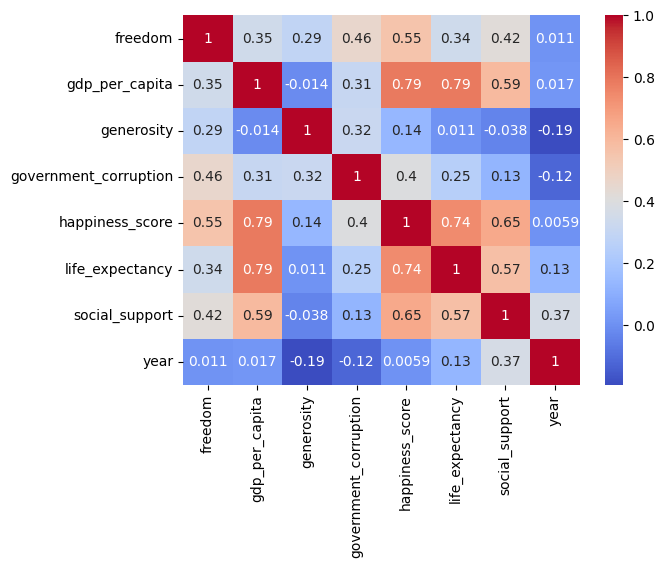

In [159]:
to_ignore = training_df.columns.difference(['country'])
correlation_matrix = training_df[to_ignore].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

### Columns with median or high correlation with Happiness Score:

1.  Freedom: 0.55

2.  GDP per Capita: 0.78

3.  Life Expectancy: 0.74

4.  Social Support: 0.65

In [160]:
features = ['freedom','gdp_per_capita','life_expectancy','social_support']

X = training_df[features]
y = training_df['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Settings
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15, min_samples_split=2, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


# Model Training
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Model validation
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculation
linear_rmse = (-linear_scores.mean()) ** 0.5
lasso_rmse = (-lasso_scores.mean()) ** 0.5
ridge_rmse = (-ridge_scores.mean()) ** 0.5
rf_rmse = (-rf_scores.mean()) ** 0.5
gb_rmse = (-gb_scores.mean()) ** 0.5

# Predictions
linear_predictions = linear_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)


# Performance Calculation
linear_mae = mean_absolute_error(y_test, linear_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Linear Regression RMSE:", linear_rmse)
print("Lasso RMSE:", lasso_rmse)
print("Ridge RMSE:", ridge_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)

print("\nLinear Regression MAE:", linear_mae)
print("Lasso MAE:", lasso_mae)
print("Ridge MAE:", ridge_mae)
print("Random Forest MAE:", rf_mae)
print("Gradient Boosting MAE:", gb_mae)

print("\nLinear Regression R^2:", linear_r2)
print("Lasso R^2:", lasso_r2)
print("Ridge R^2:", ridge_r2)
print("Random Forest R^2:", rf_r2)
print("Gradient Boosting R^2:", gb_r2)

Linear Regression RMSE: 0.5911433706966536
Lasso RMSE: 0.7187139630274834
Ridge RMSE: 0.5910483935129583
Random Forest RMSE: 0.5742592499690654
Gradient Boosting RMSE: 0.6139283031538258

Linear Regression MAE: 0.44494092269124075
Lasso MAE: 0.5341068287715692
Ridge MAE: 0.4448247112308051
Random Forest MAE: 0.3990833160299975
Gradient Boosting MAE: 0.4147646433460085

Linear Regression R^2: 0.7444652175900017
Lasso R^2: 0.6249386493840652
Ridge R^2: 0.7447018870255391
Random Forest R^2: 0.7869444332729986
Gradient Boosting R^2: 0.7625890881026232


In [161]:
training_df.describe()

,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,government_corruption,generosity,year
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.377232,0.914537,1.078780,0.612342,0.411254,0.125436,0.218618,2016.992318
std,1.127071,0.405403,0.329581,0.248459,0.152911,0.105816,0.122394,1.417814
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509000,0.605000,0.870210,0.440060,0.310480,0.054000,0.130000,2016.000000
50%,5.321000,0.982000,1.125000,0.647239,0.431000,0.091000,0.202000,2017.000000
75%,6.182000,1.233748,1.328000,0.808000,0.531000,0.156030,0.279060,2018.000000
max,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


In [162]:
predition_model_path = '../model/random_forest_model.pkl'
joblib.dump(rf_model, predition_model_path)

['../model/random_forest_model.pkl']